In [1]:
import sys
sys.path.insert(1, '/storage/home/nxt5197/work/530_stellar_atmospheres/lib/')
from statmospheres import one_Planck
from statmospheres import Planck_from_wavenumbers
from statmospheres import my_integrator
from statmospheres import integrator_wrapper
import numpy as np
import astropy.constants as const
import astropy.units as u

First, I get the BlackBody values over an arbitrary range of wavenumber values using a function in my library.

In [2]:
T = 7500*u.K
x = np.linspace(0,10000)/u.m
if x[0]==0:
    x=x[1:]
y = Planck_from_wavenumbers(T,x)

Next, I numerically integrate the array of BlackBody values over the range of wavenumbers used to obtain them.

In [3]:
dx = np.diff(x)
avey = [(y[i]+y[i-1])/2 for i in range(1,len(y))]
total = np.dot(dx,avey)*const.c
total

<Quantity 20550.89249787 erg / (cm2 Hz s2 sr)>

This seems to have worked so I turn it into a function, stick it into my library and call it to confirm.

In [4]:
my_integrator(x,y)

<Quantity 20550.89249787 erg / (cm2 Hz s2 sr)>

Now I want to use a blackbox numerical integrator to see how my answer compares. I will use the trapezoid integrator in numpy.

In [5]:
np.trapz(y,x)*const.c

<Quantity 20550.89249787 erg / (cm2 Hz s2 sr)>

Next, I have created a wrapper in my function library which will allow me to specify any x range by its minimum and maximum values, the number of points in the array, the units and the function to plug it into to obtain the corresponding y values. After obtaining the array of corresponding y values, the wrapper calls my numberical integrator to obtain the answer. Finally, integrating the answer over solid angle yields a multiplication of $\pi$ steradians.

In [6]:
x_min = 3*10**4
x_max = 10**7
density = 1000
x_units=1/u.m
T = 7500*u.K
calculation = integrator_wrapper(x_min,x_max,density,x_units,Planck_from_wavenumbers,T)
calculation = calculation.to(u.erg / u.s / u.cm**2 /u.sr)*np.pi*u.sr
calculation

<Quantity 1.79408965e+11 erg / (cm2 s)>

The analytic solution is just the Stefan-Boltzmann Law. Plugging the given temperature into this relation yields the following value for comparison.

In [7]:
truth = (const.sigma_sb*T**4).to(u.erg / u.s / u.cm**2)
truth

<Quantity 1.79414191e+11 erg / (cm2 s)>

Now I have an analytical solution and a numerical solution and I can compare the two.

In [8]:
Precision = abs(1 - calculation/truth)
Precision

<Quantity 2.91279395e-05>

In [9]:
def calc_error(x_min,x_max,density):
    x_units=1/u.m
    T = 7500*u.K
    calculation = integrator_wrapper(x_min,x_max,density,x_units,Planck_from_wavenumbers,T)
    calculation = calculation.to(u.erg / u.s / u.cm**2 /u.sr)*np.pi*u.sr
    truth = (const.sigma_sb*T**4).to(u.erg / u.s / u.cm**2)
    Precision = abs(1 - calculation/truth)
    return Precision

x_range = np.linspace(3*10**4,10**7)
x_min = x_range[0]
x_max = x_range[-1]
density_max = 1000
density_range = list(range(4,density_max))
density = density_range[-1]

In [10]:
print(np.finfo(float).eps)
print(np.finfo(np.float64).eps)

2.220446049250313e-16
2.220446049250313e-16


In [11]:
axis_label_size = 20
axis_tick_label_size = 16

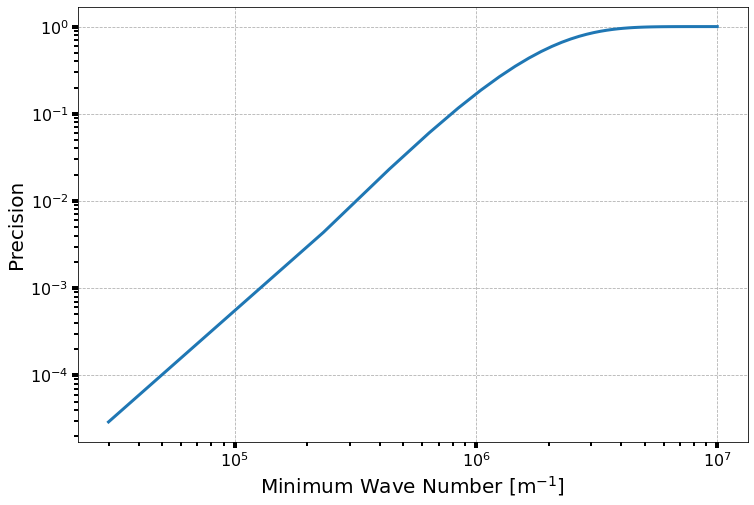

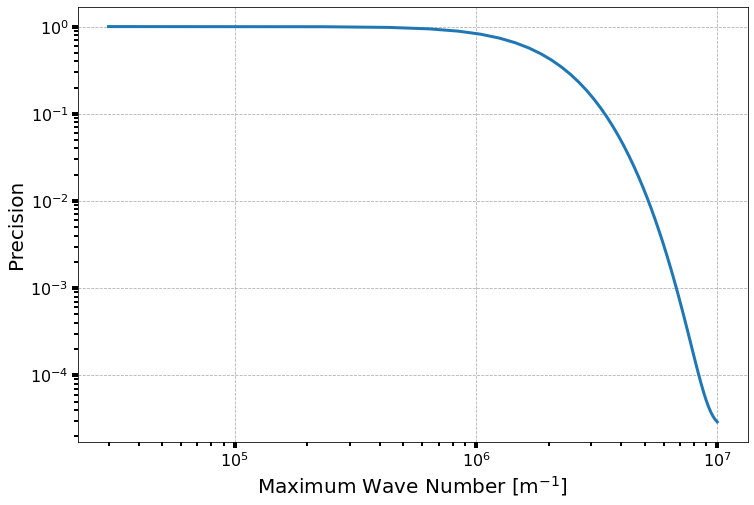

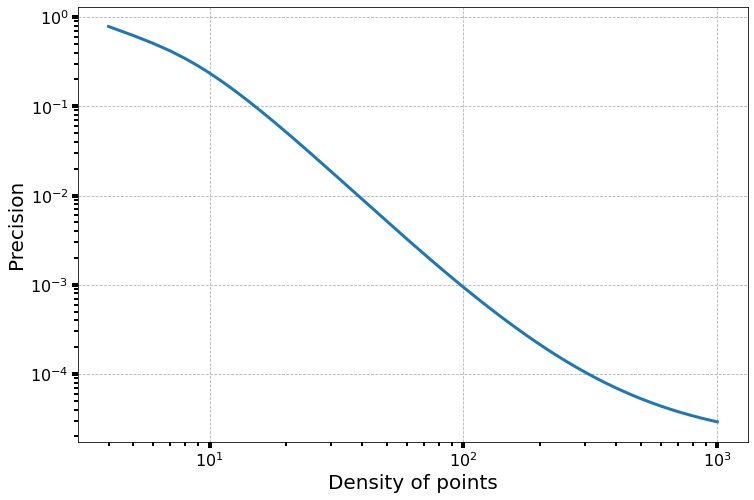

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111)
Precision=[]
for var in x_range:
    Precision.append(calc_error(var,x_max,density))
ax.plot(x_range,Precision,linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=axis_tick_label_size)
plt.yticks(fontsize=axis_tick_label_size)
ax.xaxis.set_tick_params(which='major',length=6,width=4)
ax.xaxis.set_tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(which='major',length=6,width=4)
ax.yaxis.set_tick_params(which='minor',length=4,width=2)
plt.grid(which='major', axis='both', linestyle='--')
plt.xlabel(r'Minimum Wave Number [m$^{-1}$]', fontsize=axis_label_size)
plt.ylabel(r'Precision', fontsize=axis_label_size)
path_png=os.getcwd()+f'/HW_02_plots/2b1.jpg'
plt.savefig(path_png,bbox_inches='tight',dpi=150)
plt.show()
fig = plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111)
Precision=[]
for var in x_range:
    Precision.append(calc_error(x_min,var,density))
ax.plot(x_range,Precision,linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=axis_tick_label_size)
plt.yticks(fontsize=axis_tick_label_size)
ax.xaxis.set_tick_params(which='major',length=6,width=4)
ax.xaxis.set_tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(which='major',length=6,width=4)
ax.yaxis.set_tick_params(which='minor',length=4,width=2)
plt.grid(which='major', axis='both', linestyle='--')
plt.xlabel(r'Maximum Wave Number [m$^{-1}$]', fontsize=axis_label_size)
plt.ylabel(r'Precision', fontsize=axis_label_size)
path_png=os.getcwd()+f'/HW_02_plots/2b2.jpg'
plt.savefig(path_png,bbox_inches='tight',dpi=150)
plt.show()
fig = plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111)
Precision=[]
for var in density_range:
    Precision.append(calc_error(x_min,x_max,var))
ax.plot(density_range,Precision,linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=axis_tick_label_size)
plt.yticks(fontsize=axis_tick_label_size)
ax.xaxis.set_tick_params(which='major',length=6,width=4)
ax.xaxis.set_tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(which='major',length=6,width=4)
ax.yaxis.set_tick_params(which='minor',length=4,width=2)
plt.grid(which='major', axis='both', linestyle='--')
plt.xlabel(r'Density of points', fontsize=axis_label_size)
plt.ylabel(r'Precision', fontsize=axis_label_size)
path_png=os.getcwd()+f'/HW_02_plots/2b3.jpg'
plt.savefig(path_png,bbox_inches='tight',dpi=150)
plt.show()

In [13]:
def calc_error_plus(x_min,x_max,density,constant):
    x_units=1/u.m
    T = 7500*u.K
    calculation = integrator_wrapper(x_min,x_max,density,x_units,Planck_from_wavenumbers,T)
    calculation = calculation.to(u.erg / u.s / u.cm**2 /u.sr)*np.pi*u.sr + constant
    truth = (const.sigma_sb*T**4).to(u.erg / u.s / u.cm**2)
    Precision = abs(1 - calculation/truth)
    return Precision

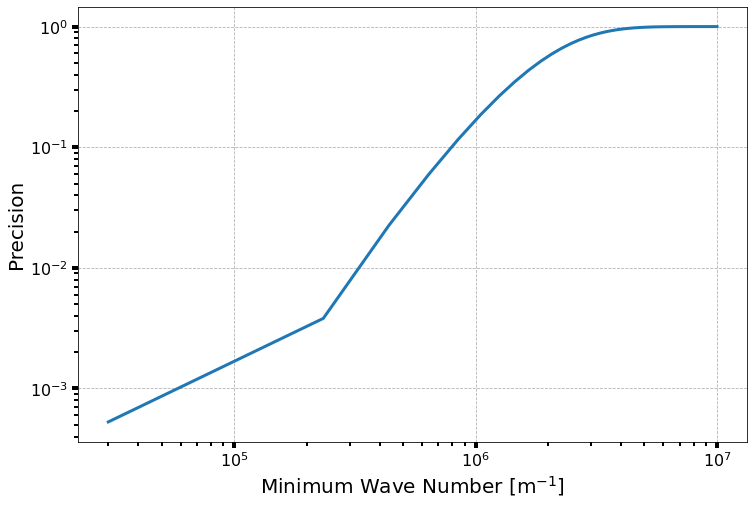

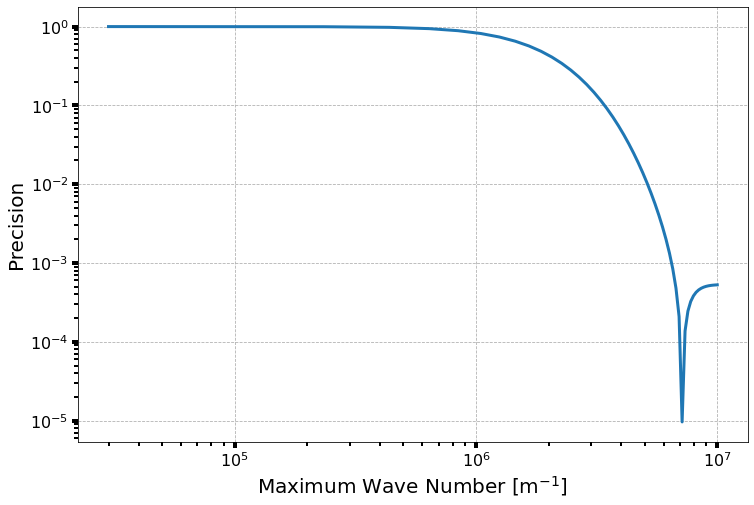

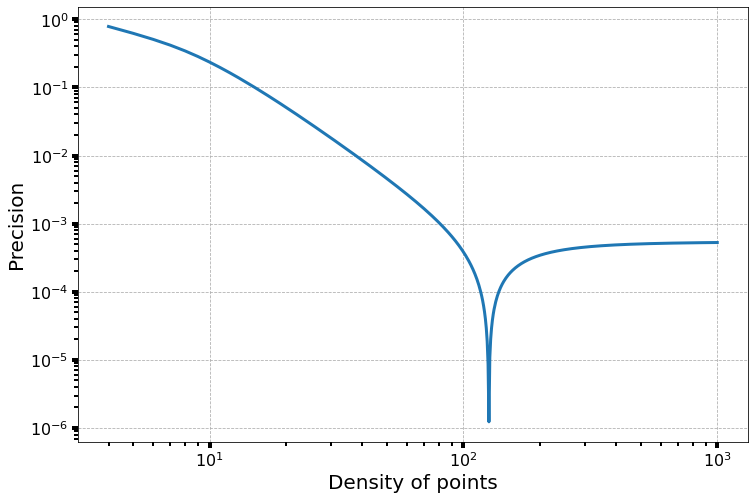

In [14]:
import matplotlib.pyplot as plt
constant = 10**8 * (u.erg / u.s / u.cm**2)
fig = plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111)
Precision=[]
for var in x_range:
    Precision.append(calc_error_plus(var,x_max,density,constant))
plt.plot(x_range,Precision,linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=axis_tick_label_size)
plt.yticks(fontsize=axis_tick_label_size)
ax.xaxis.set_tick_params(which='major',length=6,width=4)
ax.xaxis.set_tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(which='major',length=6,width=4)
ax.yaxis.set_tick_params(which='minor',length=4,width=2)
plt.grid(which='major', axis='both', linestyle='--')
plt.xlabel(r'Minimum Wave Number [m$^{-1}$]', fontsize=axis_label_size)
plt.ylabel(r'Precision', fontsize=axis_label_size)
path_png=os.getcwd()+f'/HW_02_plots/2c1.jpg'
plt.savefig(path_png,bbox_inches='tight',dpi=150)
plt.show()
fig = plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111)
Precision=[]
for var in x_range:
    Precision.append(calc_error_plus(x_min,var,density,constant))
plt.plot(x_range,Precision,linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=axis_tick_label_size)
plt.yticks(fontsize=axis_tick_label_size)
ax.xaxis.set_tick_params(which='major',length=6,width=4)
ax.xaxis.set_tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(which='major',length=6,width=4)
ax.yaxis.set_tick_params(which='minor',length=4,width=2)
plt.grid(which='major', axis='both', linestyle='--')
plt.xlabel(r'Maximum Wave Number [m$^{-1}$]', fontsize=axis_label_size)
plt.ylabel(r'Precision', fontsize=axis_label_size)
path_png=os.getcwd()+f'/HW_02_plots/2c2.jpg'
plt.savefig(path_png,bbox_inches='tight',dpi=150)
plt.show()
fig = plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111)
Precision=[]
for var in density_range:
    Precision.append(calc_error_plus(x_min,x_max,var,constant))
plt.plot(density_range,Precision,linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=axis_tick_label_size)
plt.yticks(fontsize=axis_tick_label_size)
ax.xaxis.set_tick_params(which='major',length=6,width=4)
ax.xaxis.set_tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(which='major',length=6,width=4)
ax.yaxis.set_tick_params(which='minor',length=4,width=2)
plt.grid(which='major', axis='both', linestyle='--')
plt.xlabel(r'Density of points', fontsize=axis_label_size)
plt.ylabel(r'Precision', fontsize=axis_label_size)
path_png=os.getcwd()+f'/HW_02_plots/2c3.jpg'
plt.savefig(path_png,bbox_inches='tight',dpi=150)
plt.show()

In [15]:
def calc_prec(x_min,x_max,density,calc1):
    x_units=1/u.m
    T = 7500*u.K
    calc2 = integrator_wrapper(x_min,x_max,density,x_units,Planck_from_wavenumbers,T)
    calc2 = calc2.to(u.erg / u.s / u.cm**2 /u.sr)*np.pi*u.sr
    Precision = abs(1 - calc2/calc1)
    return Precision, calc2

# x_range = np.linspace(3*10**3,10**8)
# x_min = x_range[0]
# x_max = x_range[-1]
# density_max = 2000
# density_range = list(range(4,density_max))
# density = density_range[-1]

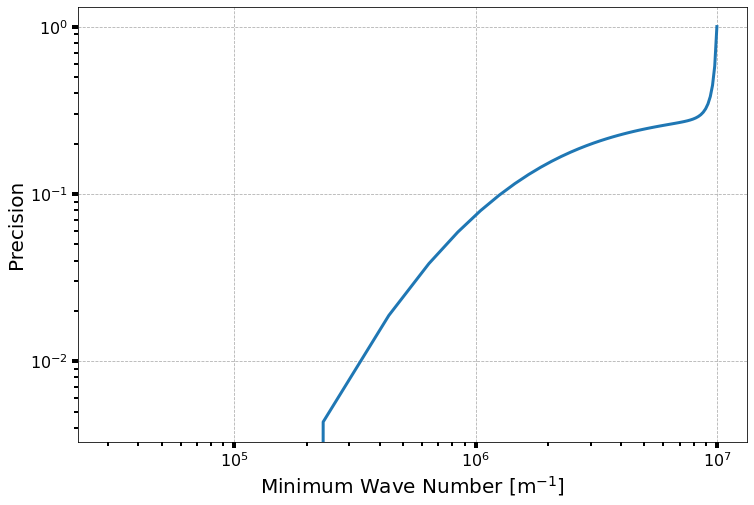

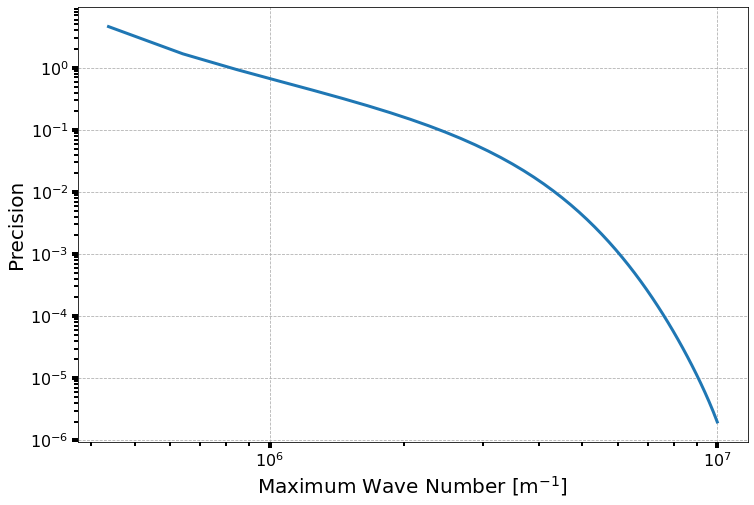

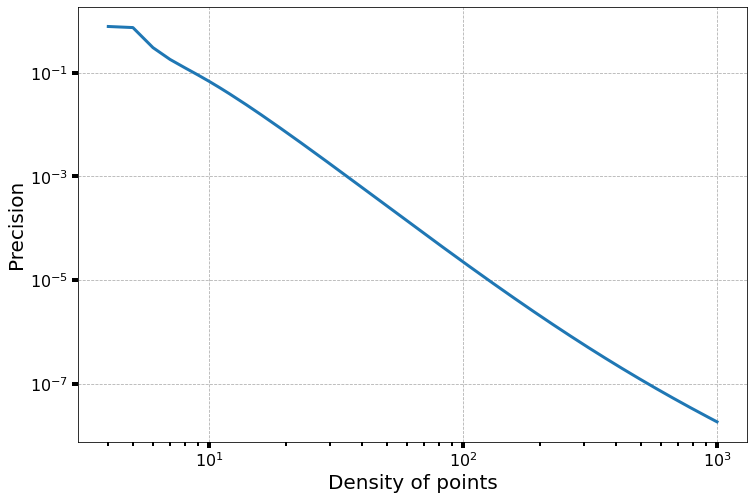

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111)
Precisions=[]
x_units=1/u.m
T = 7500*u.K
calc = integrator_wrapper(x_range[0],x_max,density,x_units,Planck_from_wavenumbers,T).to(u.erg / u.s / u.cm**2 /u.sr)*np.pi*u.sr
for var in x_range:
    Precision, calc = calc_prec(var,x_max,density,calc)
    Precisions.append(Precision)
plt.plot(x_range,Precisions,linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=axis_tick_label_size)
plt.yticks(fontsize=axis_tick_label_size)
ax.xaxis.set_tick_params(which='major',length=6,width=4)
ax.xaxis.set_tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(which='major',length=6,width=4)
ax.yaxis.set_tick_params(which='minor',length=4,width=2)
plt.grid(which='major', axis='both', linestyle='--')
plt.xlabel(r'Minimum Wave Number [m$^{-1}$]', fontsize=axis_label_size)
plt.ylabel(r'Precision', fontsize=axis_label_size)
path_png=os.getcwd()+f'/HW_02_plots/2d1.jpg'
plt.savefig(path_png,bbox_inches='tight',dpi=150)
plt.show()
fig = plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111)
Precisions=[]
x_units=1/u.m
T = 7500*u.K
calc = integrator_wrapper(x_min,x_range[0],density,x_units,Planck_from_wavenumbers,T).to(u.erg / u.s / u.cm**2 /u.sr)*np.pi*u.sr
for var in x_range:
    Precision, calc = calc_prec(x_min,var,density,calc)
    Precisions.append(Precision)
plt.plot(x_range,Precisions,linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=axis_tick_label_size)
plt.yticks(fontsize=axis_tick_label_size)
ax.xaxis.set_tick_params(which='major',length=6,width=4)
ax.xaxis.set_tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(which='major',length=6,width=4)
ax.yaxis.set_tick_params(which='minor',length=4,width=2)
plt.grid(which='major', axis='both', linestyle='--')
plt.xlabel(r'Maximum Wave Number [m$^{-1}$]', fontsize=axis_label_size)
plt.ylabel(r'Precision', fontsize=axis_label_size)
path_png=os.getcwd()+f'/HW_02_plots/2d2.jpg'
plt.savefig(path_png,bbox_inches='tight',dpi=150)
plt.show()
fig = plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111)
Precisions=[]
x_units=1/u.m
T = 7500*u.K
calc = integrator_wrapper(x_min,x_max,density,x_units,Planck_from_wavenumbers,T).to(u.erg / u.s / u.cm**2 /u.sr)*np.pi*u.sr
for var in density_range:
    Precision, calc = calc_prec(x_min,x_max,var,calc)
    Precisions.append(Precision)
plt.plot(density_range,Precisions,linewidth=3)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=axis_tick_label_size)
plt.yticks(fontsize=axis_tick_label_size)
ax.xaxis.set_tick_params(which='major',length=6,width=4)
ax.xaxis.set_tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(which='major',length=6,width=4)
ax.yaxis.set_tick_params(which='minor',length=4,width=2)
plt.grid(which='major', axis='both', linestyle='--')
plt.xlabel(r'Density of points', fontsize=axis_label_size)
plt.ylabel(r'Precision', fontsize=axis_label_size)
path_png=os.getcwd()+f'/HW_02_plots/2d3.jpg'
plt.savefig(path_png,bbox_inches='tight',dpi=150)
plt.show()